In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [347]:
df = pd.read_csv("cars24-car-price.csv")
df

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0
1,Hyundai Grand i10 Asta,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0
2,Hyundai i20 Asta,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0
3,Maruti Alto K10 2010-2014 VXI,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0
...,...,...,...,...,...,...,...,...,...,...,...
19975,Toyota Platinum Etios 1.4 GXD,6.50,2017.0,Dealer,69480,Diesel,Manual,23.59,1364.0,67.05,5.0
19976,Maruti Ertiga BSIV VXI,9.25,2019.0,Dealer,18000,Petrol,Manual,17.50,1373.0,91.10,7.0
19977,Skoda Rapid 1.5 TDI Elegance,4.25,2015.0,Dealer,67000,Diesel,Manual,21.14,1498.0,103.52,5.0
19978,Mahindra XUV500 W6 2WD,12.25,2016.0,Dealer,3800000,Diesel,Manual,16.00,2179.0,140.00,7.0


#EDA

In [348]:
df.shape

(19980, 11)

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19980 entries, 0 to 19979
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          19980 non-null  object 
 1   selling_price      19980 non-null  float64
 2   year               19980 non-null  float64
 3   seller_type        19980 non-null  object 
 4   km_driven          19980 non-null  int64  
 5   fuel_type          19980 non-null  object 
 6   transmission_type  19980 non-null  object 
 7   mileage            19980 non-null  float64
 8   engine             19980 non-null  float64
 9   max_power          19980 non-null  float64
 10  seats              19980 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.7+ MB


In [350]:
df.describe()

,selling_price,year,km_driven,mileage,engine,max_power,seats
count,19980.000000,19980.000000,1.998000e+04,19980.000000,19980.000000,19980.000000,19980.000000
mean,7.392066,2014.525125,5.824488e+04,19.347219,1476.327401,97.854443,5.317868
std,9.103088,3.249185,5.172509e+04,4.620053,520.449398,45.080670,0.835370
min,0.250000,1991.000000,1.000000e+02,0.000000,0.000000,5.000000,2.000000
25%,3.400000,2013.000000,3.116425e+04,16.800000,1197.000000,73.900000,5.000000
50%,5.200000,2015.000000,5.200000e+04,19.160000,1248.000000,86.700000,5.000000
75%,7.850000,2017.000000,7.400000e+04,22.320000,1582.000000,112.000000,5.000000
max,395.000000,2021.000000,3.800000e+06,120.000000,6752.000000,626.000000,14.000000


**<h1>Selling Price Analysis</h1>**

<Axes: xlabel='selling_price', ylabel='Count'>

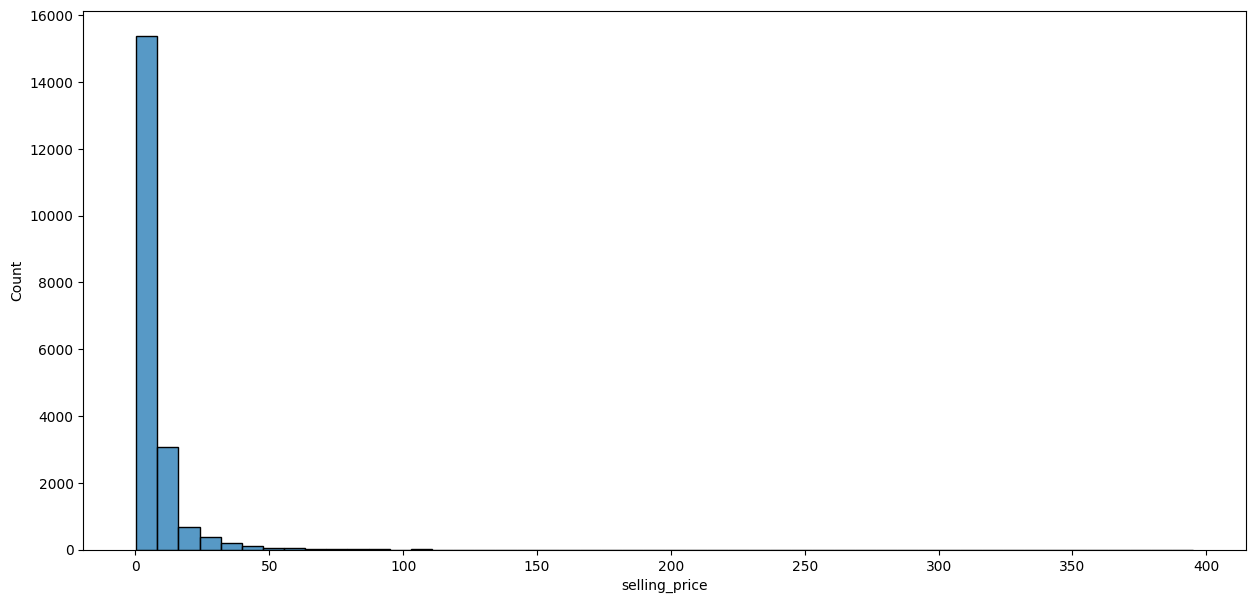

In [351]:
plt.figure(figsize = (15,7))
sns.histplot(data = df['selling_price'],bins = 50)

In [352]:

import warnings
warnings.filterwarnings('ignore')
print("Count of Selling Price Greater Than 50: ",df[df['selling_price']>50].count()[0])
print("Count of Selling Price Greater Than 100: ",df[df['selling_price']>100].count()[0])
print("Count of Selling Price Greater Than 150: ",df[df['selling_price']>150].count()[0])

Count of Selling Price Greater Than 50:  150
Count of Selling Price Greater Than 100:  11
Count of Selling Price Greater Than 150:  3


**<h1>Mileage Analysis</h1>**

<Axes: xlabel='mileage', ylabel='Count'>

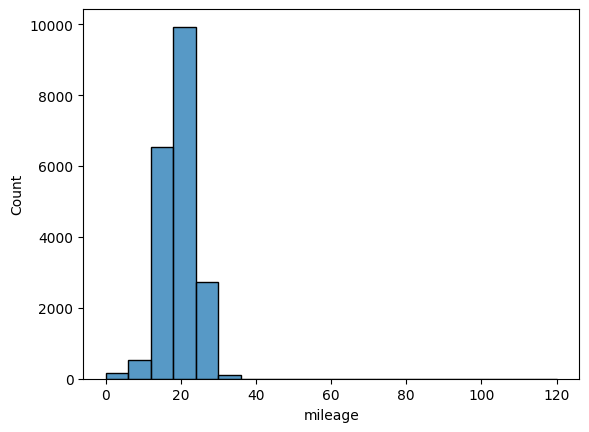

In [353]:
sns.histplot(df['mileage'],bins = 20)

In [354]:
print("Count of Mileage Greater Than 30: ",df[df['mileage']>=30].count()[0])
print("Count of Mileage Greater Than 40: ",df[df['mileage']>=40].count()[0])
print("Count of Mileage equal to 0: ",df[df['mileage']==0].count()[0])


Count of Mileage Greater Than 30:  98
Count of Mileage Greater Than 40:  4
Count of Mileage equal to 0:  160


In [355]:
df[df['mileage']==0].index

Index([  146,   270,   304,   351,   420,   470,   505,  1005,  1376,  1480,
       ...
       19114, 19315, 19425, 19429, 19532, 19772, 19824, 19880, 19968, 19970],
      dtype='int64', length=160)

In [356]:
#If mileage is 0 then we can remove those cars

df.drop(df[df['mileage'] == 0].index,inplace = True)
df.shape

(19820, 11)

**<h1>Engine Analysis</h1>**

In [357]:
df[df['engine']==0]

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
15684,Mahindra e2o T2,3.60,2015.0,Dealer,42862,Electric,Automatic,120.0,0.0,25.5,5.0
17782,Mahindra e2o T2,4.50,2015.0,Dealer,40000,Electric,Automatic,120.0,0.0,25.5,5.0
18401,Mahindra e2o Premium,3.25,2013.0,Individual,50000,Electric,Automatic,120.0,0.0,25.5,5.0


**<h1>Km_Driven analysis</h1>**

In [358]:
print("Count of Km Driven Greater Than 2,00,000: ",df[df['km_driven']>=200000].count()[0])
print("Count of Km Driven Greater Than 5,00,000: ",df[df['km_driven']>=500000].count()[0])
print("Count of Km Driven Greater Than 10,00,000: ",df[df['km_driven']>=1000000].count()[0])


Count of Km Driven Greater Than 2,00,000:  178
Count of Km Driven Greater Than 5,00,000:  18
Count of Km Driven Greater Than 10,00,000:  3


In [359]:
df[df['km_driven'] == df['km_driven'].max()] #So we can remove this

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
19978,Mahindra XUV500 W6 2WD,12.25,2016.0,Dealer,3800000,Diesel,Manual,16.0,2179.0,140.0,7.0


In [360]:
df.drop(df[df["km_driven"] == df["km_driven"].max()].index, inplace=True)
df.shape

(19819, 11)

**<h1>Seats Analysis</h1>**

In [361]:
df['seats'].value_counts()

,count
seats,
5.0,16550
7.0,2358
8.0,435
4.0,223
6.0,137
9.0,71
10.0,25
2.0,18
14.0,2


**<h1>Seller Type Analysis<h1>**

In [362]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

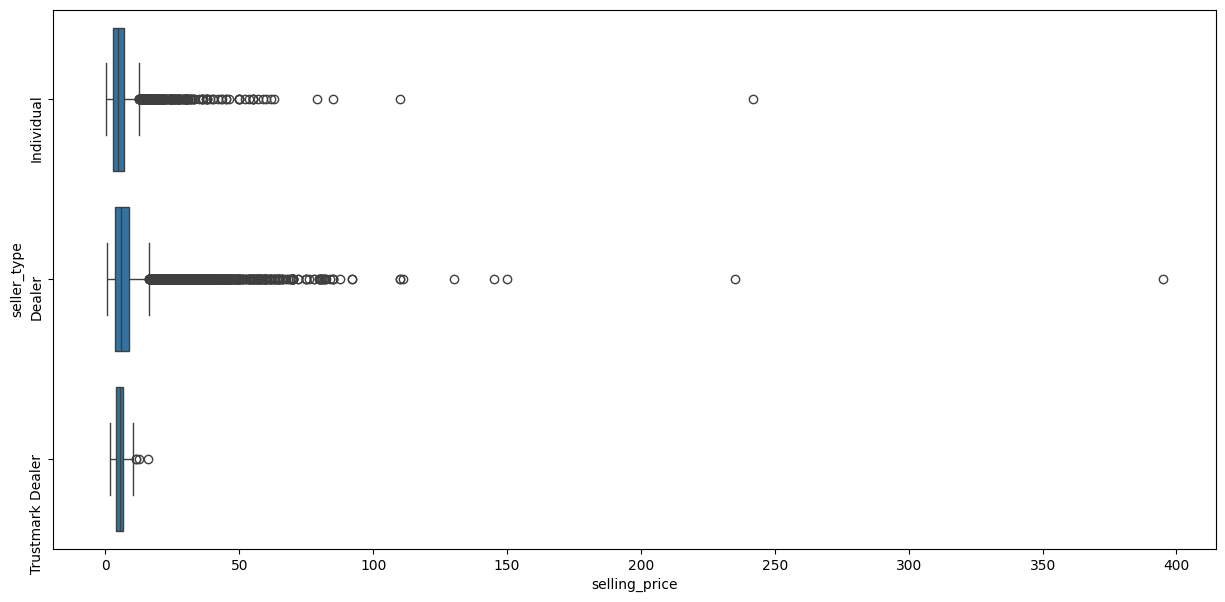

In [363]:
plt.figure(figsize = (15,7))
sns.boxplot(data = df,y = "seller_type",x = "selling_price")
plt.yticks(rotation = 90)
plt.show()

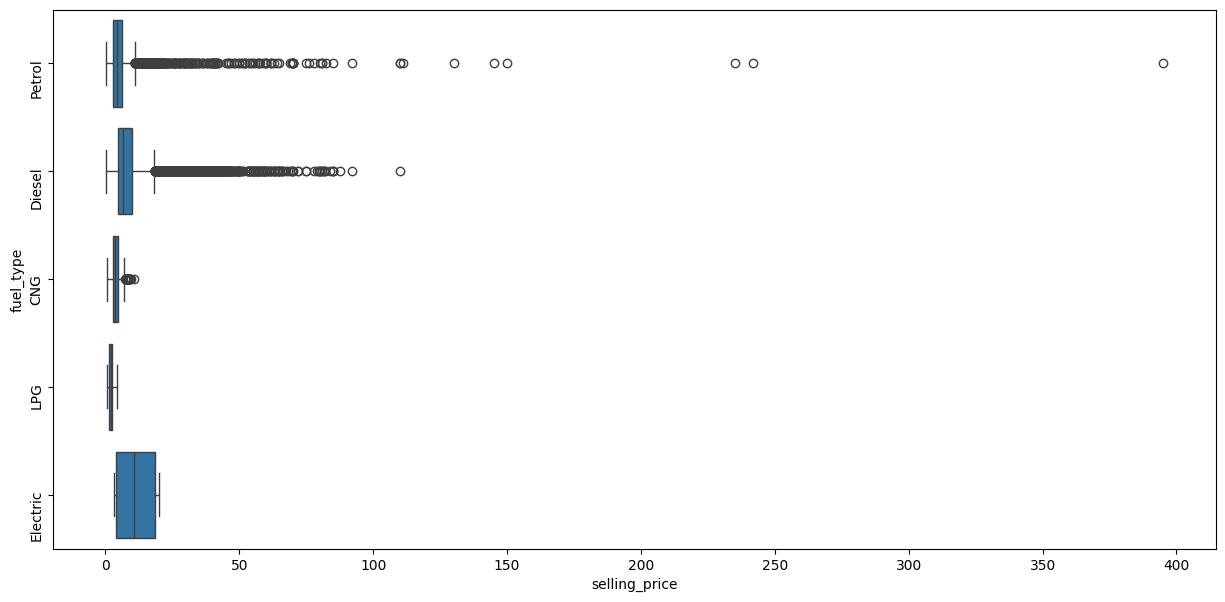

In [364]:
plt.figure(figsize = (15,7))
sns.boxplot(data = df,y = "fuel_type",x = 'selling_price')
plt.yticks(rotation = 90)
plt.show()

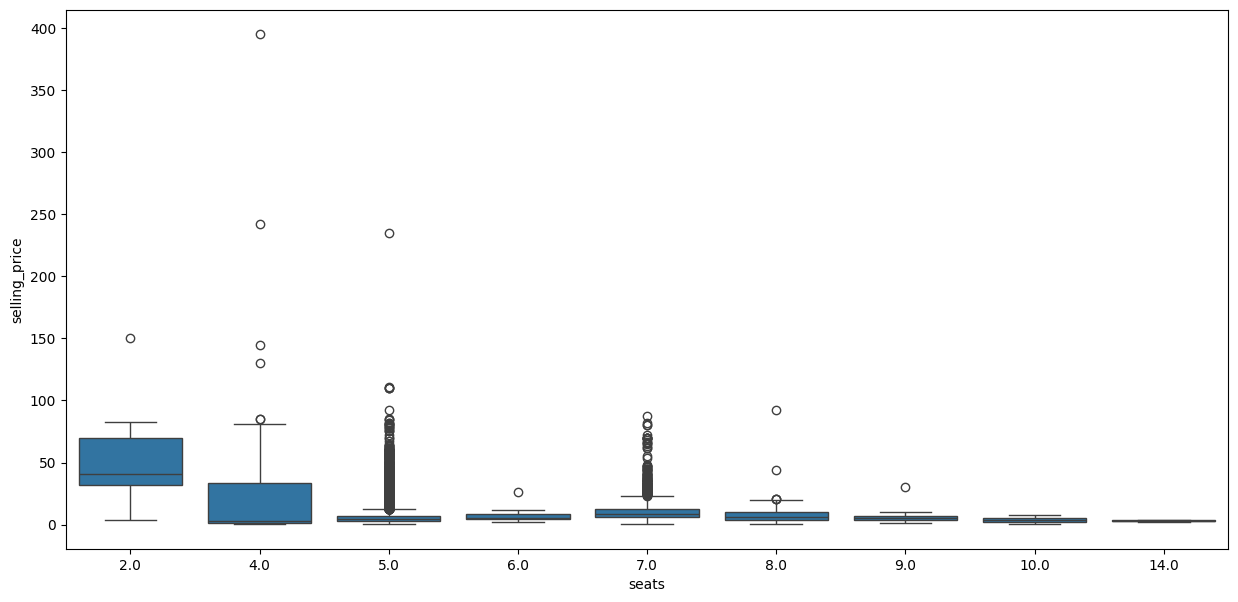

In [365]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x="seats", y="selling_price")
plt.show()

**<h2>For better visualization, let's take log of selling_price</h2>**

In [366]:
df['log_selling_price'] = np.log(df['selling_price'])
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,log_selling_price
0,Maruti Alto Std,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0,0.182322
1,Hyundai Grand i10 Asta,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0,1.704748
2,Hyundai i20 Asta,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0,0.765468
3,Maruti Alto K10 2010-2014 VXI,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0,0.815365
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0,1.740466


<Axes: xlabel='seller_type', ylabel='log_selling_price'>

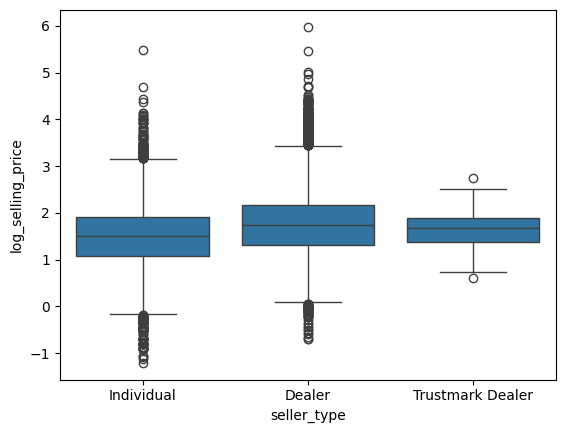

In [367]:
sns.boxplot(data = df,x = 'seller_type',y = 'log_selling_price')

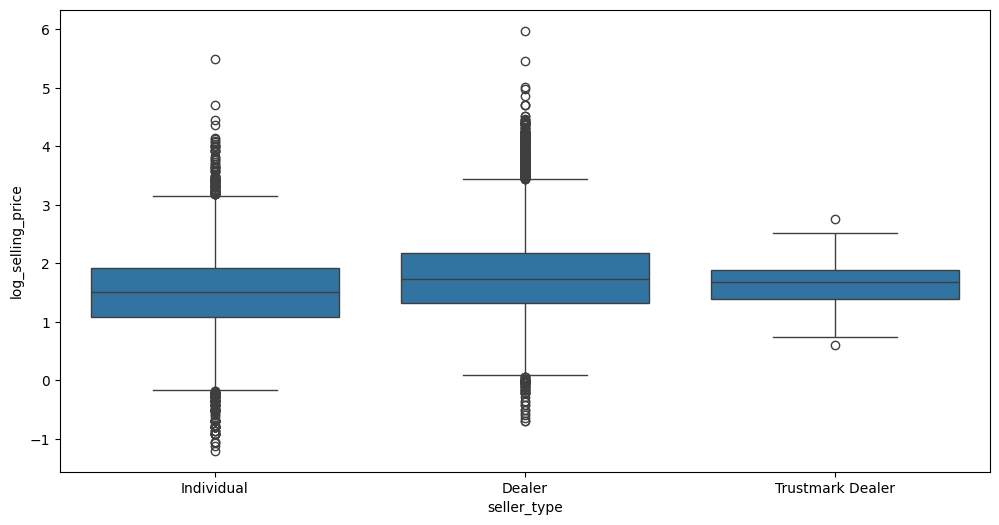

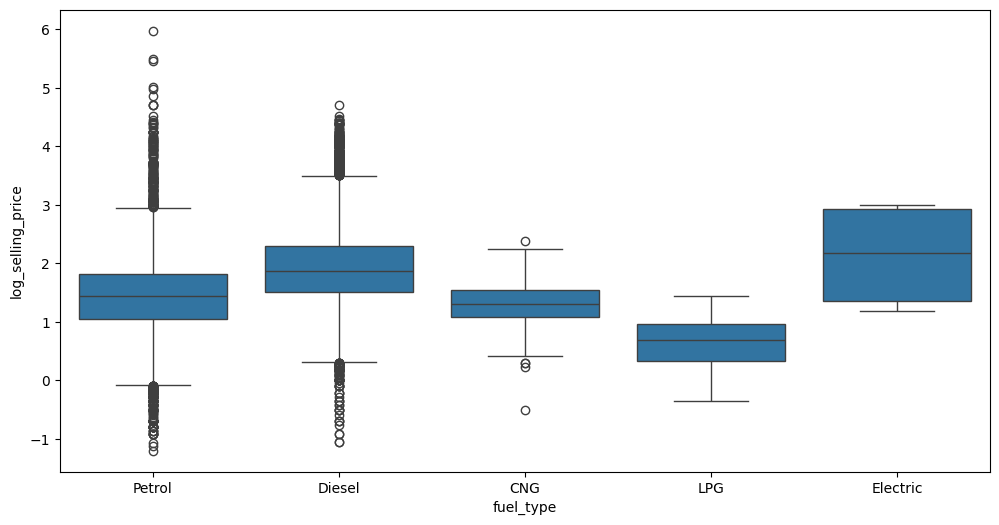

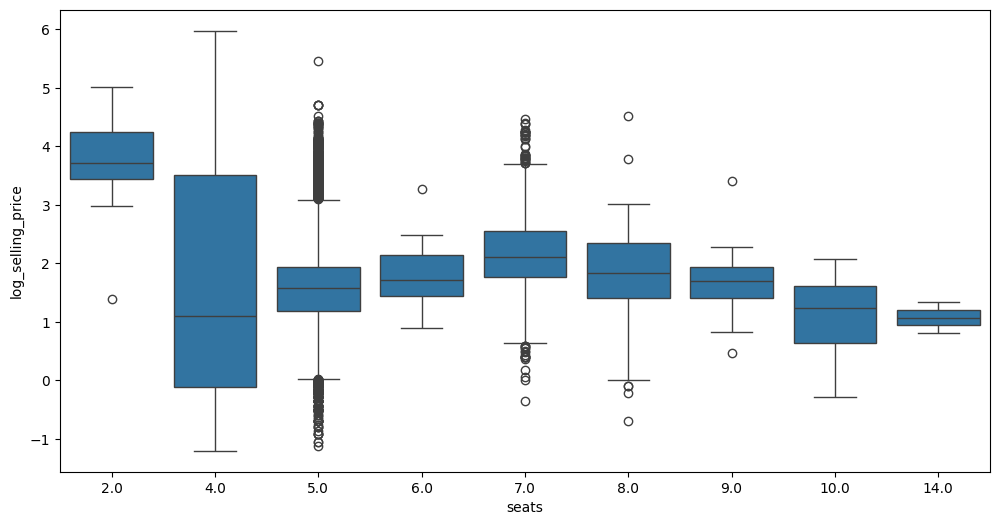

In [368]:
for col in ['seller_type','fuel_type','seats']:
  plt.figure(figsize = (12,6))
  sns.boxplot(data = df,x = col,y = 'log_selling_price')
  plt.show()


#Correlations

In [369]:
df.corr(numeric_only = True)

,selling_price,year,km_driven,mileage,engine,max_power,seats,log_selling_price
selling_price,1.000000,0.270906,-0.120447,-0.272344,0.583967,0.735016,0.073486,0.771847
year,0.270906,1.000000,-0.363637,0.262796,-0.054586,0.074105,0.004615,0.545605
km_driven,-0.120447,-0.363637,1.000000,-0.101520,0.191823,0.004712,0.189354,-0.148237
mileage,-0.272344,0.262796,-0.101520,1.000000,-0.586966,-0.473755,-0.371510,-0.228481
engine,0.583967,-0.054586,0.191823,-0.586966,1.000000,0.791330,0.483080,0.619683
max_power,0.735016,0.074105,0.004712,-0.473755,0.791330,1.000000,0.140838,0.734662
seats,0.073486,0.004615,0.189354,-0.371510,0.483080,0.140838,1.000000,0.189010
log_selling_price,0.771847,0.545605,-0.148237,-0.228481,0.619683,0.734662,0.189010,1.000000


<Axes: >

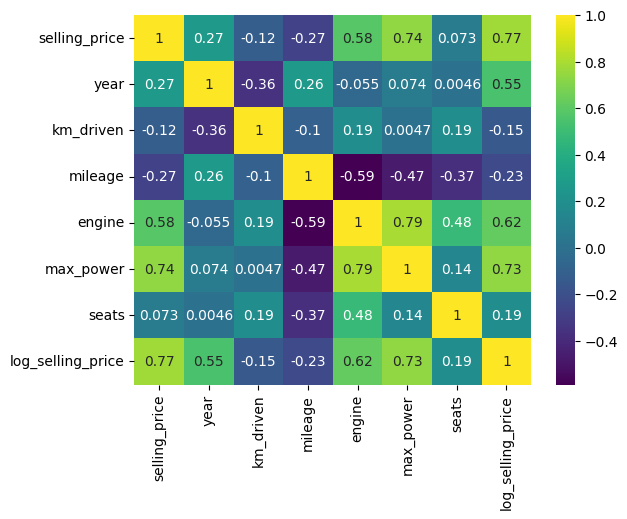

In [370]:
sns.heatmap(df.corr(numeric_only = True),annot = True,cmap = "viridis")

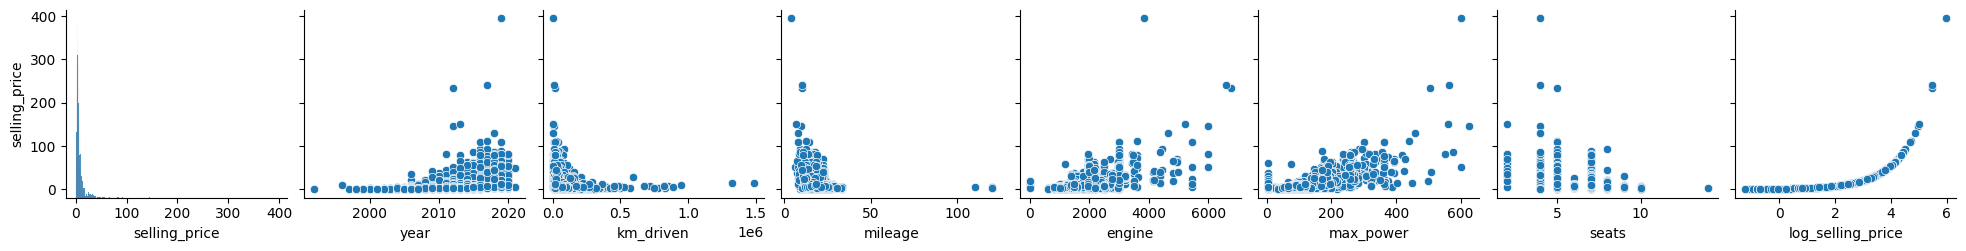

In [371]:
sns.pairplot(df,y_vars = "selling_price")

#Feature Engineering

In [372]:
df.columns

Index(['full_name', 'selling_price', 'year', 'seller_type', 'km_driven',
       'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power',
       'seats', 'log_selling_price'],
      dtype='object')

In [373]:
df['make'] = df['full_name'].str.split(" ").str[0]
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,log_selling_price,make
0,Maruti Alto Std,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0,0.182322,Maruti
1,Hyundai Grand i10 Asta,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0,1.704748,Hyundai
2,Hyundai i20 Asta,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0,0.765468,Hyundai
3,Maruti Alto K10 2010-2014 VXI,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0,0.815365,Maruti
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0,1.740466,Ford


In [374]:
# def concat_names(name_list):
#   name_list.pop(0)
#   # print(name_list)
#   model = ""
#   for name in name_list:
#     model = model + " " + name
#   return model[1:]

In [375]:
# concat_names(["Maruti", "Alto", "Std"])

In [376]:
# df['model'] = df['full_name'].str.split(" ").apply(concat_names)

In [377]:
# df.head()

In [378]:
df['model'] = df['full_name'].str.split(" ").str[1:]
df['model'] = df['model'].apply(lambda x: " ".join(x))
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,log_selling_price,make,model
0,Maruti Alto Std,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0,0.182322,Maruti,Alto Std
1,Hyundai Grand i10 Asta,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0,1.704748,Hyundai,Grand i10 Asta
2,Hyundai i20 Asta,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0,0.765468,Hyundai,i20 Asta
3,Maruti Alto K10 2010-2014 VXI,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0,0.815365,Maruti,Alto K10 2010-2014 VXI
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0,1.740466,Ford,Ecosport 2015-2021 1.5 TDCi Titanium BSIV


#Problems in this Data

**We have different name is categorical so we have to convert it into numerical**

In [379]:
df['make'].nunique()

42

**<h2>If we use One Hot Encoding to make then we will have 43 new columns</h2>**

In [380]:
df['model'].nunique()

3262

In [381]:
df['make'] = df.groupby(by = 'make')['selling_price'].transform('mean')
df['model'] = df.groupby(by = 'model')['selling_price'].transform('mean')
df.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,log_selling_price,make,model
0,Maruti Alto Std,1.20,2012.0,Individual,120000,Petrol,Manual,19.70,796.0,46.30,5.0,0.182322,4.684721,1.220000
1,Hyundai Grand i10 Asta,5.50,2016.0,Individual,20000,Petrol,Manual,18.90,1197.0,82.00,5.0,1.704748,5.460699,4.818750
2,Hyundai i20 Asta,2.15,2010.0,Individual,60000,Petrol,Manual,17.00,1197.0,80.00,5.0,0.765468,5.460699,3.394000
3,Maruti Alto K10 2010-2014 VXI,2.26,2012.0,Individual,37000,Petrol,Manual,20.92,998.0,67.10,5.0,0.815365,4.684721,2.242676
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.70,2015.0,Dealer,30000,Diesel,Manual,22.77,1498.0,98.59,5.0,1.740466,6.277078,6.777576


In [382]:
df.drop(columns = 'full_name',inplace = True)

In [383]:
fuel_col = pd.get_dummies(df['fuel_type'],drop_first = True)
fuel_col = fuel_col.astype(int)
df = pd.concat([df,fuel_col],axis = 1)
df.drop(columns = 'fuel_type',inplace = True)
# fuel_col

In [384]:
df.head()

,selling_price,year,seller_type,km_driven,transmission_type,mileage,engine,max_power,seats,log_selling_price,make,model,Diesel,Electric,LPG,Petrol
0,1.20,2012.0,Individual,120000,Manual,19.70,796.0,46.30,5.0,0.182322,4.684721,1.220000,0,0,0,1
1,5.50,2016.0,Individual,20000,Manual,18.90,1197.0,82.00,5.0,1.704748,5.460699,4.818750,0,0,0,1
2,2.15,2010.0,Individual,60000,Manual,17.00,1197.0,80.00,5.0,0.765468,5.460699,3.394000,0,0,0,1
3,2.26,2012.0,Individual,37000,Manual,20.92,998.0,67.10,5.0,0.815365,4.684721,2.242676,0,0,0,1
4,5.70,2015.0,Dealer,30000,Manual,22.77,1498.0,98.59,5.0,1.740466,6.277078,6.777576,1,0,0,0


In [385]:
transmission_col = pd.get_dummies(df['transmission_type'],drop_first = True)
transmission_col = transmission_col.astype(int)
df = pd.concat([df,transmission_col],axis = 1)
df.head()

,selling_price,year,seller_type,km_driven,transmission_type,mileage,engine,max_power,seats,log_selling_price,make,model,Diesel,Electric,LPG,Petrol,Manual
0,1.20,2012.0,Individual,120000,Manual,19.70,796.0,46.30,5.0,0.182322,4.684721,1.220000,0,0,0,1,1
1,5.50,2016.0,Individual,20000,Manual,18.90,1197.0,82.00,5.0,1.704748,5.460699,4.818750,0,0,0,1,1
2,2.15,2010.0,Individual,60000,Manual,17.00,1197.0,80.00,5.0,0.765468,5.460699,3.394000,0,0,0,1,1
3,2.26,2012.0,Individual,37000,Manual,20.92,998.0,67.10,5.0,0.815365,4.684721,2.242676,0,0,0,1,1
4,5.70,2015.0,Dealer,30000,Manual,22.77,1498.0,98.59,5.0,1.740466,6.277078,6.777576,1,0,0,0,1


In [386]:
df.drop(columns = 'transmission_type',inplace = True)

In [387]:
seller_type_col = pd.get_dummies(df['seller_type'],drop_first = True)
seller_type_col = seller_type_col.astype(int)
df = pd.concat([df,seller_type_col],axis = 1)
df.head()

,selling_price,year,seller_type,km_driven,mileage,engine,max_power,seats,log_selling_price,make,model,Diesel,Electric,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,1.20,2012.0,Individual,120000,19.70,796.0,46.30,5.0,0.182322,4.684721,1.220000,0,0,0,1,1,1,0
1,5.50,2016.0,Individual,20000,18.90,1197.0,82.00,5.0,1.704748,5.460699,4.818750,0,0,0,1,1,1,0
2,2.15,2010.0,Individual,60000,17.00,1197.0,80.00,5.0,0.765468,5.460699,3.394000,0,0,0,1,1,1,0
3,2.26,2012.0,Individual,37000,20.92,998.0,67.10,5.0,0.815365,4.684721,2.242676,0,0,0,1,1,1,0
4,5.70,2015.0,Dealer,30000,22.77,1498.0,98.59,5.0,1.740466,6.277078,6.777576,1,0,0,0,1,0,0


In [388]:
df.drop(columns = 'seller_type',inplace = True)

In [389]:
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,seats,log_selling_price,make,model,Diesel,Electric,LPG,Petrol,Manual,Individual,Trustmark Dealer
0,1.20,2012.0,120000,19.70,796.0,46.30,5.0,0.182322,4.684721,1.220000,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,5.0,1.704748,5.460699,4.818750,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,5.0,0.765468,5.460699,3.394000,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,5.0,0.815365,4.684721,2.242676,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,5.0,1.740466,6.277078,6.777576,1,0,0,0,1,0,0


#Problem 2 : UnScaled Data

In [390]:
df["<=5"] = (df['seats']<=5).astype(int)
df['>5'] = (df['seats']>5).astype(int)
df.drop(columns = 'seats',inplace = True)

In [391]:
from sklearn.preprocessing import MinMaxScaler

In [392]:
scaler = MinMaxScaler()

In [393]:
# scaler.fit_transform(df)
# pd.DataFrame(scaler.fit_transform(df))
# df.columns

df = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,log_selling_price,make,model,Diesel,Electric,LPG,Petrol,Manual,Individual,Trustmark Dealer,<=5,>5
0,0.002280,0.689655,0.080746,0.135345,0.117891,0.066506,0.193000,0.009905,0.002268,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1,0.013175,0.827586,0.013402,0.128448,0.177281,0.123994,0.404953,0.011873,0.011386,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
2,0.004687,0.620690,0.040339,0.112069,0.177281,0.120773,0.274186,0.011873,0.007776,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
3,0.004966,0.689655,0.024850,0.145862,0.147808,0.100000,0.281133,0.009905,0.004859,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
4,0.013681,0.793103,0.020136,0.161810,0.221860,0.150709,0.409926,0.013944,0.016349,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#Splitting Tranining & Testing Data

In [394]:
from sklearn.model_selection import train_test_split

In [395]:
x = df.drop(columns = 'selling_price')
y = df['selling_price']

In [396]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state =43)


#Univariate Analysis Using Sklearn

In [397]:
x = df[['model']]
y = df['selling_price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state =43)


In [398]:
from sklearn.linear_model import LinearRegression

In [399]:
model = LinearRegression()

In [400]:
model.fit(x_train,y_train)

LinearRegression()

In [401]:
model.coef_

array([0.99755607])

In [402]:
model.intercept_

9.750933239820528e-05

In [403]:
y_train_pred = model.predict(x_train)
y_train_pred

array([0.02160341, 0.00997035, 0.03406622, ..., 0.06818758, 0.01286158,
       0.01514057])

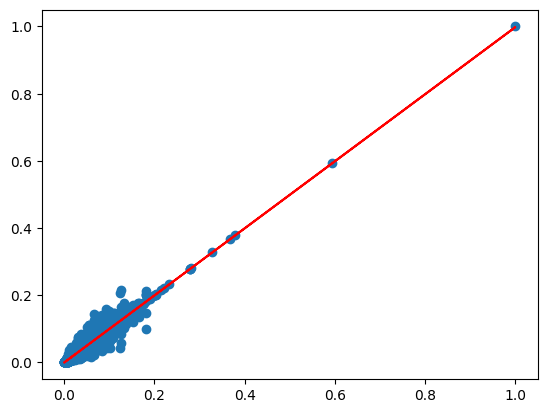

In [404]:
plt.scatter(x_train,y_train)
plt.plot(x_train,y_train_pred,color = 'red')

#MultiVariate Analysis

In [405]:
x = df.drop(columns = 'selling_price')
y = df['selling_price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state =43)


In [406]:
model2 = LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [407]:
model2.coef_

array([-2.27132521e-03, -1.55669261e-02, -7.15323231e-03,  1.13532018e-03,
       -1.72266048e-02,  3.27087219e-02,  3.70983085e-02,  9.16432780e-01,
       -9.12553842e-04,  2.46391560e-03,  1.45121651e-03, -2.84388474e-04,
        1.41379135e-03,  3.84747385e-04, -4.94418423e-04,  4.55568245e-04,
       -4.55568245e-04])

In [408]:
model2.intercept_

-0.007547528942711008

In [409]:
y_train_pred = model2.predict(x_train)
np.sum((y_train_pred - y_train)**2)

0.3672398620868639

In [410]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = x_train.columns
feature_importance['importance'] = model2.coef_
feature_importance

,feature,importance
0,year,-0.002271
1,km_driven,-0.015567
2,mileage,-0.007153
3,engine,0.001135
4,max_power,-0.017227
5,log_selling_price,0.032709
6,make,0.037098
7,model,0.916433
8,Diesel,-0.000913
9,Electric,0.002464


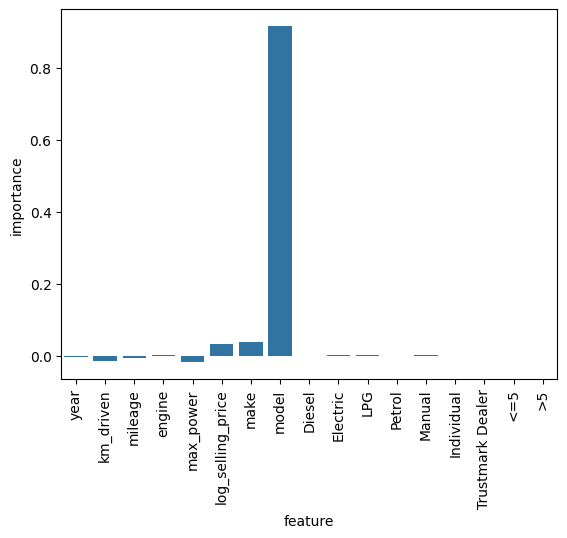

In [411]:
sns.barplot(data = feature_importance,x = 'feature',y = 'importance')
plt.xticks(rotation = 90)
plt.show()

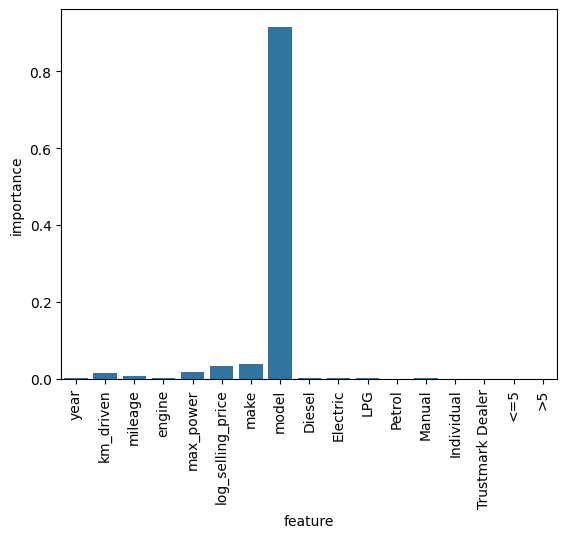

In [412]:
feature_importance['importance'] = np.abs(feature_importance['importance'])
sns.barplot(data = feature_importance,x = 'feature',y = 'importance')
plt.xticks(rotation = 90)
plt.show()

In [413]:
feature_importance.sort_values(by = 'importance',ascending = False).reset_index(drop = True)

,feature,importance
0,model,0.916433
1,make,0.037098
2,log_selling_price,0.032709
3,max_power,0.017227
4,km_driven,0.015567
5,mileage,0.007153
6,Electric,0.002464
7,year,0.002271
8,LPG,0.001451
9,Manual,0.001414


#Evaluating Error in Our Model

In [414]:
y_test_pred = model2.predict(x_test)

In [415]:
mae = np.mean(np.abs(y_test_pred - y_test))
mae

0.002483536779632819

In [416]:
mse = np.mean(np.abs(y_test_pred - y_test)**2)
mse

2.356727001840701e-05

In [417]:
y_mean = y_train.mean()
ss_res = np.sum((y_test_pred - y_test)**2)
ss_total = np.sum((y_test - y_mean)**2)
r2 = 1 - (ss_res/ss_total)
r2

0.9549057441392768